In [1]:
import visualize

import pickle
import os

import neat
from neat.genome import DefaultGenome


In [2]:
# O certo seria importar a classe, mas está dando erro
class DroneGenome(DefaultGenome):
    def __init__(self, key):
        super().__init__(key)

    def configure_new(self, config):
        """Inicializa o genoma e define 'tanh' para nós de saída."""
        super().configure_new(config)
        
        # Nós de saída têm IDs de 0 a (num_outputs - 1)
        output_ids = range(4)
        for node_id in self.nodes:
            node = self.nodes[node_id]
            if node_id in output_ids:  # Verifica se o ID é de saída
                node.activation = 'tanh'

    def mutate(self, config):
        """Personaliza a mutação para ignorar a função de ativação dos nós de saída."""
        super().mutate(config)

        # Nós de saída têm IDs de 0 a (num_outputs - 1)
        output_ids = range(4)
        for node_id in self.nodes:
            node = self.nodes[node_id]
            if node_id in output_ids:  # Verifica se o ID é de saída
                node.activation = 'tanh'

In [3]:
with open("../results/checkpoints-neat-fixed/stats.pkl", "rb") as f:
    stats = pickle.load(f)
with open("../results/checkpoints-neat-fixed/winner.pkl", "rb") as f:
    winner = pickle.load(f)

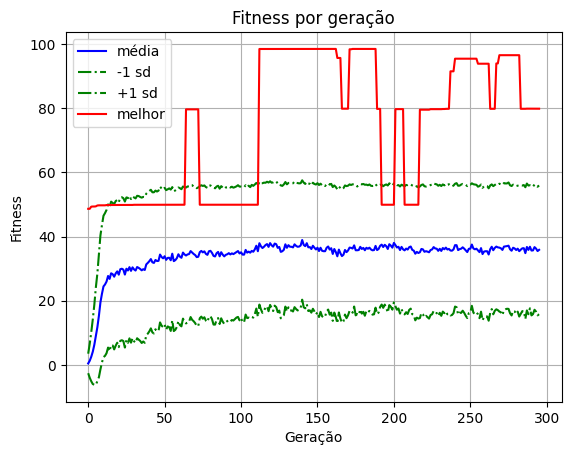

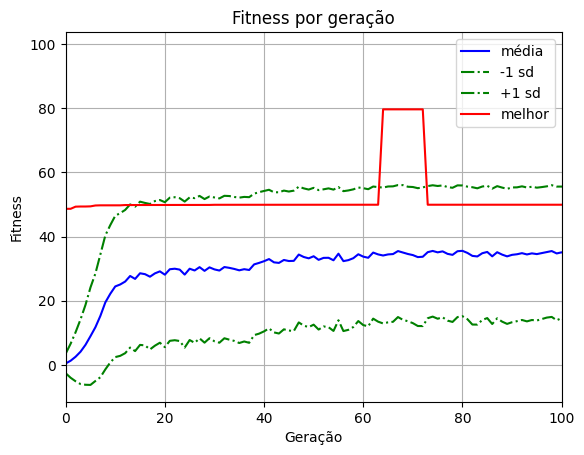

In [4]:
visualize.plot_stats(stats, ylog=False, view=True, filename="fitness.svg")
visualize.plot_stats(stats, set_lim=True, ylog=False, view=True, filename="fitness_começo.svg")



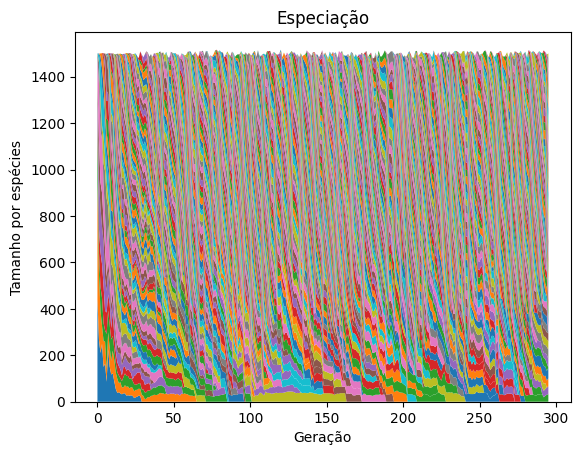

In [5]:
visualize.plot_species(stats, view=True, filename="species.svg")

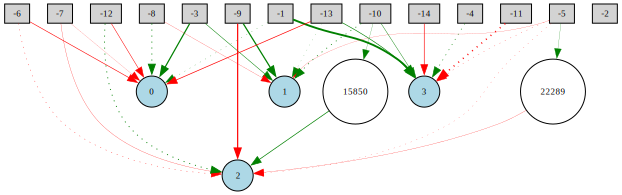

In [6]:
local_dir = os.path.abspath('')
config_path = os.path.join(local_dir, 'config')
config = neat.Config(DroneGenome, neat.DefaultReproduction,
                    neat.DefaultSpeciesSet, neat.DefaultStagnation,
                    config_path)
visualize.draw_net(config, winner, view=True)

Try running the update-desktop-database command. If you
don't have this command you should install the
desktop-file-utils package. This package is available from
http://freedesktop.org/wiki/Software/desktop-file-utils/


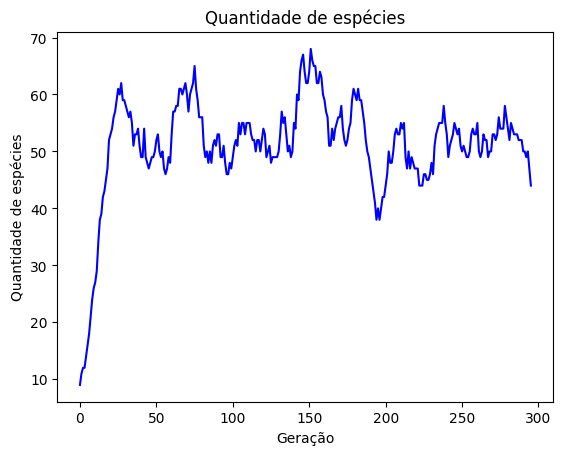

In [7]:
visualize.plot_number_species(stats, view=True)